In [1]:
import networkx as nx
import time
import random 
import bisect 
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.count_col import *
from Module.Curve_Fitting_MLE import *
from scipy.optimize import curve_fit
%matplotlib inline
plt.style.use('classic')

In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'Moby-Dick'
filename = name + '.txt' #change filename if you want to get statictical information of another

In [3]:
##text file.
big, syl, word, longest = info(filename, encode)
#count_col(word, syl)

read file successfully!
Successfully count word freqency!(Moby-Dick.txt)
Successfully count syl freqency!
Successfully build data frames!


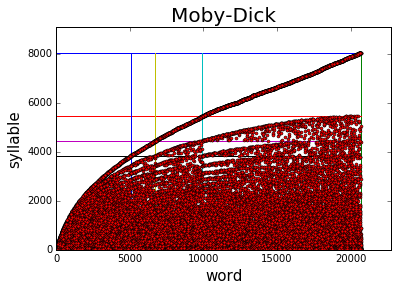

2.716019868850708


In [4]:
V, H = geometric_sequence(word, syl)
need_line = 'Y'
number_of_lines = 4
Color = '#ff0000'
SP = 'N' #If you don't want to save picture, just assign SP != 'T'
FORMAT = 'png' #the format of your picture

tStart = time.time()
cooridnate = draw_RRD_plot(big, word, syl, longest, name, V, H, need_line, number_of_lines, Color, SP , FORMAT)
tEnd = time.time()
print(tEnd-tStart)


In [5]:
'''
f = open('HDMonaLisa.txt','r')
x,y = [],[]
for i in f:
    co = i.split(',')
for i in range(len(co)):
    if i%2 == 0: #x coordinate
        x.append(int(co[i].split('(')[1]))
    elif i%2 == 1: #y coordinate
        y.append(int(co[i].split(')')[0]))

cooridnate = []
for i in range(len(x)):
    cooridnate.append((x[i],y[i]))
'''

"\nf = open('HDMonaLisa.txt','r')\nx,y = [],[]\nfor i in f:\n    co = i.split(',')\nfor i in range(len(co)):\n    if i%2 == 0: #x coordinate\n        x.append(int(co[i].split('(')[1]))\n    elif i%2 == 1: #y coordinate\n        y.append(int(co[i].split(')')[0]))\n\ncooridnate = []\nfor i in range(len(x)):\n    cooridnate.append((x[i],y[i]))\n"

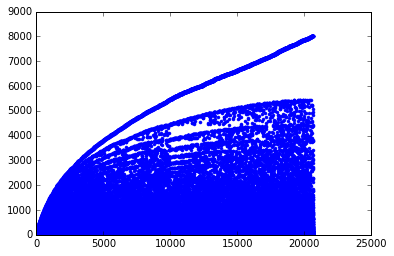

In [6]:
x, y = [], []
for i in range(len(cooridnate)):
    x.append(cooridnate[i][0])
    y.append(cooridnate[i][1])

plt.plot(x, y, '.')
plt.show()

In [7]:
temp = sorted(cooridnate, key = lambda x: x[1])
edge_syl = np.zeros((max(y), max(y)))
edge_word = np.zeros((max(x), max(x)))
lonely_word = [] #share no syl to other word
lonely_syl = []  #share no word to other syl
edge_syl_list = []
edge_word_list = []


for j in range(max(y)):
    col = [] #collocation
    for i in temp:
        if i[1] == j+1:   #word share the same syl
            col.append(i[0])
        elif i[1] > j+1:
            break
    for k in range(len(col)):
        if len(col) == 1:
            lonely_word.append((col[k], col[k]))
        else:
            for m in range(k+1, len(col)):
                edge_word[col[k]-1][col[m]-1] += 1
                edge_word[col[m]-1][col[k]-1] += 1
                edge_word_list.append((col[k], col[m]))

In [8]:
temp = sorted(cooridnate, key = lambda x: x[0])

for j in range(max(x)):
    com = [] 
    for i in temp:
        if i[0] == j+1:   #syl share the same word
            com.append(i[1])
        elif i[0] > j+1:
            break
    for k in range(len(com)):
        if len(com) == 1:
            lonely_syl.append((com[k], com[k]))
        else:
            for m in range(k+1, len(com)):
                edge_syl[com[k]-1][com[m]-1] += 1
                edge_syl[com[m]-1][com[k]-1] += 1
                edge_syl_list.append((com[k], com[m]))

In [9]:
tStart = time.time()

G_word = nx.Graph()
#G_word.add_nodes_from(x)
G_word.add_edges_from(edge_word_list)
cluster_word = nx.clustering(G_word)
word_degree_sequence = sorted([d for n, d in G_word.degree()], reverse=True)  # degree sequence

G_syl = nx.Graph()
#G_syl.add_nodes_from(y)
G_syl.add_edges_from(edge_syl_list)
cluster_syl = nx.clustering(G_syl)
syl_degree_sequence = sorted([d for n, d in G_syl.degree()], reverse=True)  # degree sequence

tEnd = time.time()
print(tEnd-tStart)

518.3676059246063


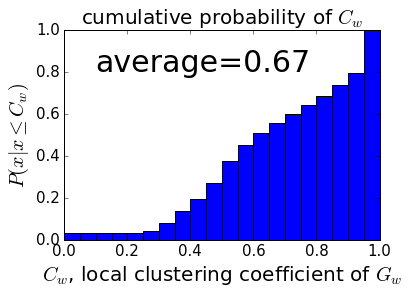

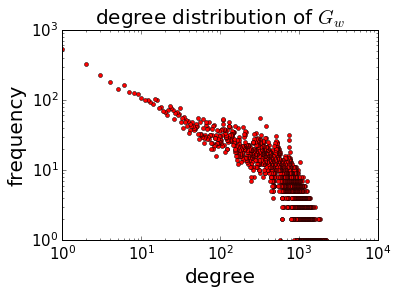

In [10]:
fig, ax = plt.subplots()

cluster_rank_word = list(cluster_word)
cluster_coef_word = sorted([cluster_word[i] for i in cluster_word], reverse = True)
plt.title('cumulative probability of $C_w$', fontsize = 20)
plt.xlabel('$C_w$, local clustering coefficient of $G_w$', size = 20)
plt.ylabel('$P(x|x\leq C_w)$', size = 20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
plt.hist(cluster_coef_word, bins = 20, cumulative=True, density = 1)
ym, yM = plt.ylim()
xm, xM = plt.xlim()
plt.text(xM/10+xm*9/10, yM*4/5, 'average=%.2f' % (sum(cluster_coef_word)/len(cluster_coef_word)), fontsize=30)
fig.savefig('cluster_word_' + name + '.eps', dpi = 400, format = 'eps')
plt.show()


#use MLE to get the fitting parameter, detial read: Curve_Fitting_MLE
D = count_frequency(word_degree_sequence)
#T = ([degree], [degreeFreq]) #we don't fit those which degree = 0
T = ([], [])
for i in D:
    if i != 0:
        T[0].append(i)
        T[1].append(D[i])

fig, ax = plt.subplots()
plt.xlabel('degree', size = 20)
plt.ylabel('frequency', size = 20)
plt.xscale('log')
plt.yscale('log')
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
plt.title('degree distribution of $G_w$', fontsize = 20)
plt.plot(T[0], T[1], 'ro', markersize=4)
fig.savefig('degree_word_' + name + '.eps', dpi = 400, format = 'eps')
plt.show()

In [12]:
tStart = time.time()

pathL_word = nx.shortest_path_length(G_word)  #shorest path length
#in networkx 2.0, the structure of pathL_syl will be 
#[(source_A, {target_B: distance, target_C: distance}), (source_B, {...}), ...]
tEnd = time.time()
print(tEnd-tStart)

0.00014901161193847656


In [13]:
sum_shorest_path_word= []
for source_i, target_set in pathL_word: #target_set = {target: distance, target: distance, ...}
    sp_i = 0 #sum_shorest_path for node i
    for j in target_set:
        sp_i += target_set[j]
    sum_shorest_path_word.append(sp_i)

KeyboardInterrupt: 

In [ ]:
nonzero_sp_word = []
for i in sum_shorest_path_word:
    if i !=0:
        nonzero_sp_word.append(i)
n_nonzero_word = len(nonzero_sp_word)
avg_spL_word = sum(nonzero_sp_word)/(n_nonzero_word*(n_nonzero_word-1))
n_word = len(sum_shorest_path_word)
s_word = [i/n_word for i in sum_shorest_path_word]

fig, ax = plt.subplots()
plt.hist(s_word, bins = 20)
plt.xlabel('path length in $G_w$', size = 20)
plt.ylabel('frequency', size = 20)
#plt.xscale('log')
plt.yscale('log')
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
plt.title('distribution of path length', fontsize = 20)
ym, yM = plt.ylim()
xm, xM = plt.xlim()
plt.text(xM/6+xm*5/6, yM/2, 'average without zero=%.2f' % avg_spL_word, fontsize=20)
fig.savefig('path_word_' + name + '.eps', dpi = 400, format = 'eps')
plt.show()
print('exclude zero path, the avg_path is', avg_spL_word)

In [ ]:
cluster_rank_syl = list(cluster_syl)
cluster_coef_syl = sorted([cluster_syl[i] for i in cluster_syl], reverse = True)
fig, ax = plt.subplots()
plt.title('probability distribution of $C_s$', fontsize = 20)
plt.xlabel('$C_s$, local clustering coefficient of $G_s$', size = 20)
plt.ylabel('probability density', size = 20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
plt.hist(cluster_coef_syl, bins = 20, normed = 1)
ym, yM = plt.ylim()
xm, xM = plt.xlim()
plt.text(xM/6+xm*5/6, yM/2, 'average=%.2f' % (sum(cluster_coef_syl)/len(cluster_coef_syl)), fontsize=30)
fig.savefig('cluster_syl_' + name + '.eps', dpi = 400, format = 'eps')
plt.show()

#use MLE to get the fitting parameter, detial read: Curve_Fitting_MLE
D = count_frequency(syl_degree_sequence)
#T = ([degree], [degreeFreq]) #we don't fit those which degree = 0
T = ([], [])
for i in D:
    if i != 0:
        T[0].append(i)
        T[1].append(D[i])
Y = Two_to_One(T)
res = minimize(L_Zipf_Mandelbrot, (3, 0), Y, method = 'CG')
s = res['x'][0]
a = res['x'][1]
t = [int(min(T[0])), int(max(T[0])), s]
C = 1 / incomplete_shifted_harmonic(t, a)
xdata = np.linspace(min(T[0]), max(T[0]), num = (max(T[0]) - min(T[0]))*10)
theo = Zipf_Mandelbrot(xdata, s, C, a) #Notice theo is normalized, i.e, the probability density
N = sum(T[1])
theo = [N * i for i in theo] #change theo from probability density to real frequency

fig, ax = plt.subplots()
plt.xlabel('degree', size = 20)
plt.ylabel('frequency', size = 20)
plt.xscale('log')
plt.yscale('log')
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
plt.title('degree distribution of $G_s$', fontsize = 20)
plt.text(2, 0.1,'$f(x)\sim(x+%.3f)^{-%.3f}$'%(a, s), fontsize=12)
plt.plot(T[0], T[1], 'ro', markersize=4)
plt.plot(xdata, theo, 'g-')
plt.xscale('log')
plt.yscale('log')
fig.savefig('degree_syl_' + name + '.eps', dpi = 400, format = 'eps')
plt.show()

In [ ]:
pathL_syl = list(nx.shortest_path_length(G_syl))  #shorest path length
#in networkx 2.0, the structure of pathL_syl will be 
#[(source_A, {target_B: distance, target_C: distance}), (source_B, {...}), ...]

In [ ]:
sum_shorest_path_syl= []
for source_i, target_set in pathL_syl: #target_set = {target: distance, target: distance, ...}
    sp_i = 0 #sum_shorest_path for node i
    for j in target_set:
        sp_i += target_set[j]
    sum_shorest_path_syl.append(sp_i)

In [ ]:
nonzero_sp_syl = []
for i in sum_shorest_path_syl:
    if i !=0:
        nonzero_sp_syl.append(i)
n_nonzero_syl = len(nonzero_sp_syl)
avg_spL_syl = sum(nonzero_sp_syl)/(n_nonzero_syl*(n_nonzero_syl-1))
n_syl = len(sum_shorest_path_syl)
s_syl = [i/n_syl for i in sum_shorest_path_syl]
fig, ax = plt.subplots()
plt.hist(s_syl, bins = 20)
plt.xlabel('path length in $G_s$', size = 20)
plt.ylabel('frequency', size = 20)
#plt.xscale('log')
plt.yscale('log')
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
plt.title('distribution of path length', fontsize = 20)
ym, yM = plt.ylim()
xm, xM = plt.xlim()
plt.text(xM/6+xm*5/6, yM/2, 'average without zero=%.2f' % avg_spL_syl, fontsize=20)
fig.savefig('path_syl_' + name + '.eps', dpi = 400, format = 'eps')
plt.show()
print('exclude zero path, the avg_path is', avg_spL_syl)

# small world

In [ ]:
from Module.utils import not_implemented_for
from Module.utils import py_random_state
import numpy as np

@py_random_state(3)
@not_implemented_for('directed')
@not_implemented_for('multigraph')
def random_reference(G, niter=1, connectivity=True, seed=None):
    """Compute a random graph by swapping edges of a given graph.

    Parameters
    ----------
    G : graph
        An undirected graph with 4 or more nodes.

    niter : integer (optional, default=1)
        An edge is rewired approximately `niter` times.

    connectivity : boolean (optional, default=True)
        When True, ensure connectivity for the randomized graph.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : graph
        The randomized graph.

    Notes
    -----
    The implementation is adapted from the algorithm by Maslov and Sneppen
    (2002) [1]_.

    References
    ----------
    .. [1] Maslov, Sergei, and Kim Sneppen.
           "Specificity and stability in topology of protein networks."
           Science 296.5569 (2002): 910-913.
    """
    if G.is_directed():
        msg = "random_reference() not defined for directed graphs."
        raise nx.NetworkXError(msg)
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")

    from Module.utils import cumulative_distribution, discrete_sequence
    local_conn = nx.connectivity.local_edge_connectivity

    G = G.copy()
    keys, degrees = list(G_word.degree()),[G_word.degree(n) for n in G_word]  # keys, degree
    cdf = cumulative_distribution(degrees)  # cdf of degree
    nnodes = len(G)
    nedges = nx.number_of_edges(G)
    niter = niter*nedges
    ntries = int(nnodes*nedges/(nnodes*(nnodes-1)/2))
    swapcount = 0

    for i in range(niter):
        n = 0
        while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = seed.choice(list(G.neighbors(a)))
            d = seed.choice(list(G.neighbors(c)))
            bi = keys.index(b)
            di = keys.index(d)
            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                G.add_edge(a, d)
                G.add_edge(c, b)
                G.remove_edge(a, b)
                G.remove_edge(c, d)

                # Check if the graph is still connected
                if connectivity and local_conn(G, a, b) == 0:
                    # Not connected, revert the swap
                    G.remove_edge(a, d)
                    G.remove_edge(c, b)
                    G.add_edge(a, b)
                    G.add_edge(c, d)
                else:
                    swapcount += 1
                    break
            n += 1
    return G

@py_random_state(4)
@not_implemented_for('directed')
@not_implemented_for('multigraph')
def lattice_reference(G, niter=1, D=None, connectivity=True, seed=None):
    """Latticize the given graph by swapping edges.

    Parameters
    ----------
    G : graph
        An undirected graph with 4 or more nodes.

    niter : integer (optional, default=1)
        An edge is rewired approximatively niter times.

    D : numpy.array (optional, default=None)
        Distance to the diagonal matrix.

    connectivity : boolean (optional, default=True)
        Ensure connectivity for the latticized graph when set to True.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : graph
        The latticized graph.

    Notes
    -----
    The implementation is adapted from the algorithm by Sporns et al. [1]_.
    which is inspired from the original work by Maslov and Sneppen(2002) [2]_.

    References
    ----------
    .. [1] Sporns, Olaf, and Jonathan D. Zwi.
       "The small world of the cerebral cortex."
       Neuroinformatics 2.2 (2004): 145-162.
    .. [2] Maslov, Sergei, and Kim Sneppen.
       "Specificity and stability in topology of protein networks."
       Science 296.5569 (2002): 910-913.
    """
    import numpy as np
    from networkx.utils import cumulative_distribution, discrete_sequence
    local_conn = nx.connectivity.local_edge_connectivity

    if G.is_directed():
        msg = "lattice_reference() not defined for directed graphs."
        raise nx.NetworkXError(msg)
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")
    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    G = G.copy()
    keys, degrees = list(G_word.degree()),[G_word.degree(n) for n in G_word]  # keys, degree
    cdf = cumulative_distribution(degrees)  # cdf of degree

    nnodes = len(G)
    nedges = nx.number_of_edges(G)
    if D is None:
        D = np.zeros((nnodes, nnodes))
        un = np.arange(1, nnodes)
        um = np.arange(nnodes - 1, 0, -1)
        u = np.append((0,), np.where(un < um, un, um))

        for v in range(int(np.ceil(nnodes / 2))):
            D[nnodes - v - 1, :] = np.append(u[v + 1:], u[:v + 1])
            D[v, :] = D[nnodes - v - 1, :][::-1]

    niter = niter*nedges
    ntries = int(nnodes * nedges / (nnodes * (nnodes - 1) / 2))
    swapcount = 0

    for i in range(niter):
        n = 0
        while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = seed.choice(list(G.neighbors(a)))
            d = seed.choice(list(G.neighbors(c)))
            bi = keys.index(b)
            di = keys.index(d)

            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                if D[ai, bi] + D[ci, di] >= D[ai, ci] + D[bi, di]:
                    # only swap if we get closer to the diagonal
                    G.add_edge(a, d)
                    G.add_edge(c, b)
                    G.remove_edge(a, b)
                    G.remove_edge(c, d)

                    # Check if the graph is still connected
                    if connectivity and local_conn(G, a, b) == 0:
                        # Not connected, revert the swap
                        G.remove_edge(a, d)
                        G.remove_edge(c, b)
                        G.add_edge(a, b)
                        G.add_edge(c, d)
                    else:
                        swapcount += 1
                        break
            n += 1

    return G

In [ ]:
#https://networkx.github.io/documentation/latest/reference/algorithms/smallworld.html
def omega(G):
    # G = G_w or G_s
    niter=100
    nrand=10
    randMetrics = {"C": [], "L": []}
    for i in range(nrand):
        Gr = random_reference(G, niter=1)
        Gl = lattice_reference(G, niter=1)
        randMetrics["C"].append(nx.transitivity(Gl))
        randMetrics["L"].append(nx.average_shortest_path_length(Gr))
    C = nx.transitivity(G)
    n = len(G)
    if G == G_syl:
        L = sum(s_syl)/(n_syl - 1)
    elif G == G_word:
        L = sum(s_word)/(n_word - 1)
    Cl = np.mean(randMetrics["C"])
    Lr = np.mean(randMetrics["L"])
    
    print('coefficients Lr, L, C, Cl are')
    print(Lr, L, C, Cl)
    print('omega is')
    omega = (Lr / L) - (C / Cl)

    print(omega)

In [ ]:
omega(G_word)